In [ ]:
!pip install requests
!pip install beautifulsoup4
!pip install bitsandbytes transformers==4.30 accelerate sentencepiece
!pip install alpaca-py
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.30.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, AutoModelForSequenceClassification
from bs4 import BeautifulSoup
import requests
import torch
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import yfinance as yf

if torch.cuda.is_available():
  torch.set_default_device('cuda')

bnb_config = BitsAndBytesConfig(
  load_in_4bit=True,
  bnb_4bit_use_double_quant=True,
  bnb_4bit_quant_type="nf4",
  bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained("4bit/Llama-2-7b-chat-hf", quantization_config=bnb_config, torch_dtype="auto", load_in_4bit=True)

tokenizer = AutoTokenizer.from_pretrained("4bit/Llama-2-7b-chat-hf", torch_dtype="auto")
tokenizer.use_default_system_prompt = False

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

In [ ]:
tokenizer2 = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model2 = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:463: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cp

In [ ]:
tickers = ['AMD']
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'}
total_score = 0
count = 0

for ticker in tickers:
  print(f"***Ticker: {ticker}***")
  url = f'https://finviz.com/quote.ashx?t={ticker}&p=d'
  r = requests.get(url, headers=headers)
  soup = BeautifulSoup(r.text, 'html.parser')
  headlines = soup.find_all('a', class_='tab-link-news')
  dates = [td.text.strip() for td in soup.find_all('td', width='130', align='right')]
  scores = []
  for index, headline in enumerate(headlines):
    if '?' not in headline.text and index < 15:
      print(f"Headline: {headline.text}")
      date_info = dates[index] if index < len(dates) else 'Unknown Date'
      print(f"Date: {date_info}")
      prompt = f"Take a deep breath. You are an expert financial analyst. Answer in a few sentences. Do not include anything else besides your answer. Determine the sentiment of this headline in the context of {ticker}'s stock price and add a short explanation. Let's think step by step:"
      combined_prompt = f"<s>[INST] <<SYS>>\n{prompt}\n<</SYS>>/n/n{headline.text} [/INST]"

      generated_text = model.generate(
        tokenizer.encode(combined_prompt, return_tensors="pt"),
        max_length=1024,
        temperature=0.7,
        num_beams=4,
        top_k=40,
        top_p=0.1
      )

      decoded_text = tokenizer.decode(generated_text[0]).replace(combined_prompt, '').replace('<s>  ','').replace('</s>','')

      inputs = tokenizer2(decoded_text, return_tensors="pt")

      outputs = model2(**inputs)
      predictions = outputs.logits

      probabilities = predictions.softmax(dim=1)

      highest_score, highest_index = torch.max(probabilities, dim=1)
      highest_score = highest_score.item()

      sentiment_labels = {0: 'Positive', 1: 'Negative', 2: 'Neutral'}
      highest_sentiment = sentiment_labels[highest_index.item()]

      if(highest_index == 0):
        scores.append(highest_score)
        total_score += highest_score
        count += 1
      elif(highest_index == 1):
        scores.append(-highest_score)
        total_score -= highest_score
        count += 1

      print(f"Processed Headline: {decoded_text}")
      print(f"Sentiment: {highest_sentiment} {highest_score}")
      print(f"Current score: {total_score}")
      print("-------------------------------")

      torch.cuda.empty_cache()
      print('--------------------------------------------------------------------------------------------------------------')

if count:
  total_score /= count
  print(total_score)

***Ticker: AMD***
Headline: Intel stock jumps on positive outlook despite Q3 losses
Date: Today 04:12PM


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1259: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


Processed Headline: The sentiment of the headline "Intel stock jumps on positive outlook despite Q3 losses" in the context of AMD's stock price is likely neutral to bullish. The fact that Intel's stock is jumping despite reporting Q3 losses suggests that investors are focusing on the company's positive outlook and potential for future growth, rather than its current financial performance. This could be a sign that investors are optimistic about Intel's ability to recover and continue to perform well in the future, which could have a positive impact on AMD's stock price as well.
Sentiment: Positive 0.6817812919616699
Current score: 0.6817812919616699
-------------------------------
--------------------------------------------------------------------------------------------------------------
Headline: Nvidia stock sinks on fears of AI spending slowdown
Date: 02:51PM
Processed Headline: The sentiment of the headline "Nvidia stock sinks on fears of AI spending slowdown" in the context of A

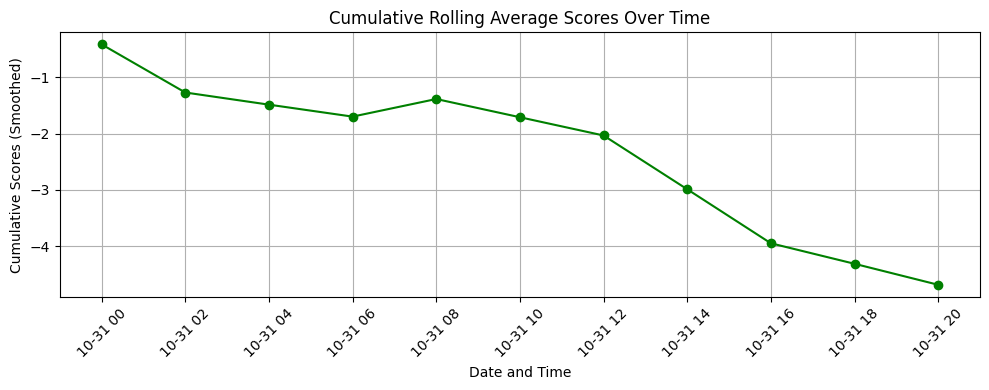

In [ ]:
dates = dates[:13]
scores = scores[:13]

# Convert timestamps to datetime objects
converted_timestamps = [pd.to_datetime(ts, format="%m-%d %H") for ts in dates]

# Calculate the rolling average of the scores
window_size = 3
rolling_scores = pd.Series(scores).rolling(window=window_size).mean()

rolling_scores = rolling_scores.dropna()

cumulative_rolling_scores = rolling_scores.cumsum()

# Adjust the timestamps to match the rolling window output
adjusted_timestamps = converted_timestamps[window_size - 1:]

plt.figure(figsize=(10, 4))
plt.plot(adjusted_timestamps, cumulative_rolling_scores, marker='o', linestyle='-', color='g')
plt.title('Cumulative Rolling Average Scores Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Cumulative Scores (Smoothed)')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
ticker = "AMD"

# Get the current date and the date 7 days ago
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=7)

# Fetch historical data for the past 7 days
amd_data = yf.download(ticker, start=start_date, end=end_date)

plt.figure(figsize=(10, 5))
plt.plot(amd_data.index, amd_data['Close'], label='AMD Close Price', marker='o')
plt.title('AMD Stock Price Over the Past 7 Days')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [ ]:
from google.colab import userdata
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest, TakeProfitRequest, StopLossRequest, GetOrdersRequest
from alpaca.data.historical.stock import StockHistoricalDataClient, StockLatestQuoteRequest
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from alpaca.trading.enums import OrderSide, TimeInForce, OrderClass, QueryOrderStatus

secret = userdata.get('alpaca_secret')
key = userdata.get('alpaca_key')

# Instantiate the TradingClient
client = TradingClient(key, secret, paper=True)
historical_data_client = StockHistoricalDataClient(key, secret)


ticker = "AMD"
ema_period = 20

def calculate_ema(prices, period):
    return prices.ewm(span=period, adjust=False).mean()

# Create request parameters using StockBarsRequest
request_params = StockBarsRequest(
    symbol_or_symbols=ticker,
    timeframe=TimeFrame.Day,
    start=datetime.datetime(2024, 10, 4),
    end=datetime.datetime(2024, 10, 18)
)

historical_data = historical_data_client.get_stock_bars(request_params)

bars_df = historical_data.df

bars_df['close'] = bars_df['close'].astype(float)
bars_df['ema'] = calculate_ema(bars_df['close'], ema_period)


request_params = StockLatestQuoteRequest(symbol_or_symbols=[ticker])
latest_quote = historical_data_client.get_stock_latest_quote(request_params)
latest_ask_price = latest_quote[ticker].ask_price

last_ema_value = bars_df['ema'].iloc[-1]

magic_no = total_score
quantity = abs(magic_no) * 1000 / latest_ask_price

bars_df = historical_data.df

if magic_no > 0 and latest_ask_price > last_ema_value:
    bracket_order = client.submit_order(MarketOrderRequest(
        symbol=ticker,
        qty=round(quantity),
        side=OrderSide.BUY,
        time_in_force=TimeInForce.DAY,
        order_class=OrderClass.BRACKET,
        stop_loss=StopLossRequest(stop_price=round(latest_ask_price * 0.9)),
        take_profit=TakeProfitRequest(limit_price=round(latest_ask_price * 1.1))
    ))
elif magic_no < 0 and latest_ask_price < last_ema_value:
    short_order = client.submit_order(MarketOrderRequest(
        symbol=ticker,
        qty=round(quantity),
        side=OrderSide.SELL,
        time_in_force=TimeInForce.DAY,
        order_class=OrderClass.BRACKET,
        stop_loss=StopLossRequest(stop_price=round(latest_ask_price * 1.1)),
        take_profit=TakeProfitRequest(limit_price=round(latest_ask_price * 0.9))
    ))

get_orders_data = GetOrdersRequest(
    status=QueryOrderStatus.CLOSED,
    limit=1
)

get_orders_data = GetOrdersRequest(
    status=QueryOrderStatus.CLOSED,
    limit=1
)

latest_orders = client.get_orders(filter=get_orders_data)

for order in latest_orders:
    order_type = order.side
    quantity = order.qty
    print(f"Order Type: {order_type}, Quantity: {quantity}")